In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
J0 = -7.3
J2 = 11
A = 40 
eps = 0.1 
c = 0.8
N = 50 
tau = 10
a = 2 
theta_0 = 0 

T = 50 
dt = 0.1 

def ring_attractor(J0 = J0, J2 = J2, eps = eps, c = c, A = A, a = a, N = N, T = T, dt = dt, tau = tau, theta_0 = theta_0):
    n_steps = int(T / dt)

    theta = np.linspace(-np.pi/2, np.pi/2, N)
    dtheta = theta[1] - theta[0]
    h0 = A * c * (1 - eps + eps * np.cos(2 * theta))

    F = lambda x: np.maximum(0, x)

    r = a * np.cos(2 * (theta - theta_0))

    for _ in range(n_steps):
        I_theta = np.zeros_like(theta)
        for i, th in enumerate(theta):
            # Numerical integration 
            integral = J0 + J2 * np.cos(2 * (th - theta))
            recurrent = np.sum(integral * r) * dtheta / np.pi
            I_theta[i] = h0[i] + recurrent
        r += dt * (-r + F(I_theta)) / tau

    return theta, r

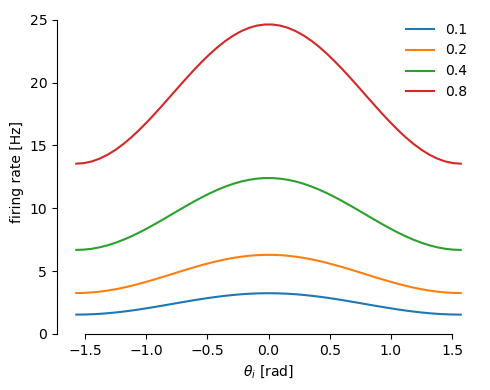

In [5]:
cs = [0.1, 0.2, 0.4, 0.8]

fig = plt.figure(figsize = (5, 4))
for i, c in enumerate(cs):
    theta, r = ring_attractor(c = c, J0 = -0.5, J2 = 1)

    plt.plot(theta, r, label = f'{c}')

plt.yticks([0, 5, 10, 15, 20, 25])
plt.xlabel(r'$\theta_i$ [rad]')
plt.ylabel('firing rate [Hz]')
plt.legend(frameon = False)
sns.despine(trim = True)
plt.tight_layout()
plt.savefig('hw4-1.pdf')

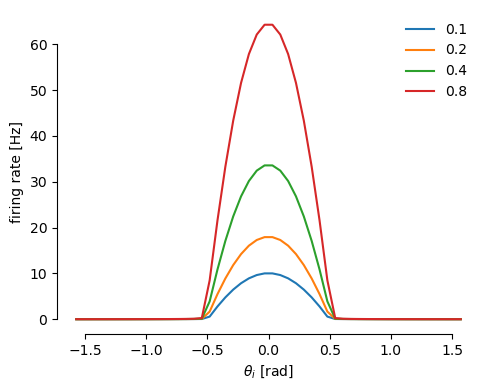

In [3]:
cs = [0.1, 0.2, 0.4, 0.8]

fig = plt.figure(figsize = (5, 4))
for i, c in enumerate(cs):
    theta, r = ring_attractor(c = c)

    plt.plot(theta, r, label = f'{c}')

# plt.yticks([0, 5, 10, 15, 20, 25])
plt.xlabel(r'$\theta_i$ [rad]')
plt.ylabel('firing rate [Hz]')
plt.legend(frameon = False)
sns.despine(trim = True)
plt.tight_layout()
plt.savefig('hw4-2.pdf')